Name: Hanh Tran

Course: DSC 530 

Due Date: 8/8/2020

10.4 Assignment: Term Project

This dataset is from kaggle. 
Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)2)

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes 
based on family history)

Age: Age (years)

Outcome: Class variable (0 if non-diabetic, 1 if diabetic)


Questions: What is the chance that an incoming patient have diabetes?

What variables are more correlated with having diabetes?

Null Hypothesis: The variable Glucose and BMI does not predict a diabetes outcome

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sb

In [144]:
# load original dataset
org_diabetesDF = pd.read_csv("Diabetes.csv")
org_diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [145]:
org_diabetesDF.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


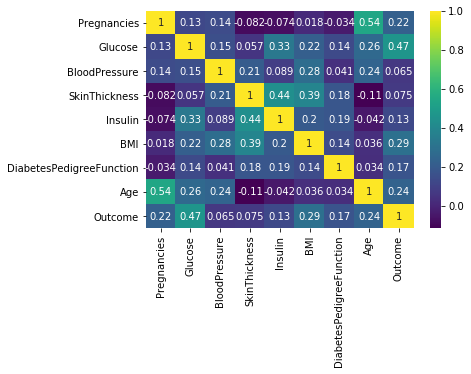

In [146]:
sb.heatmap(org_diabetesDF.corr(), annot=True, cmap="viridis");

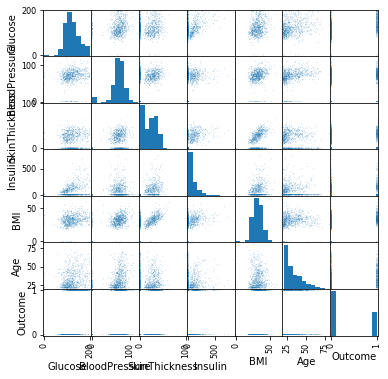

In [147]:
# Based on corr map, Dropping columns Blood Pressure, Skin Thickness, Insulin 
# which has the lowest correlations
org_diabetesDF = org_diabetesDF.drop(['BloodPressure', 'SkinThickness', 'Insulin'], axis=1)
pd.plotting.scatter_matrix(df, figsize=(6,6), s=2);

In [148]:
# Interested in the variables Pregnancies, Glucose, BMI, DiabetesPedigreeFunction, Age, Outcome
org_diabetesDF.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1


In [149]:
# Remove rows where there are any zeros that are NULL values
# Keeping zeros in Pregnancies and Outcome as those are valid 
diabetesDF = org_diabetesDF.loc[~(org_diabetesDF[org_diabetesDF.columns[1:-1]] == 0).any(axis =1)]
diabetesDF.describe()
     

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,67.100000,2.420000,81.000000,1.000000


In [150]:
# check for diabetic outcome based on the mean of explanatory variables
diabetesDF.groupby('Outcome').mean()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,
0,3.321721,110.825820,30.876434,0.429848,31.309426
1,4.829545,142.488636,35.371970,0.552909,37.015152


diabetic outcome tend to be older, have more pregnancies, have a higher glucose, BMI and Diabetes history in family

In [151]:
outcome_diabetic = diabetesDF.loc[diabetesDF['Outcome'] == 1]
outcome_NonDiabetic = diabetesDF.loc[diabetesDF['Outcome'] == 0]
print(outcome_diabetic.shape, outcome_NonDiabetic.shape)

(264, 6) (488, 6)


264 people have diabetes
488 people don't have diabetes
For normalize purposes for number of people in different groups in probability distribution

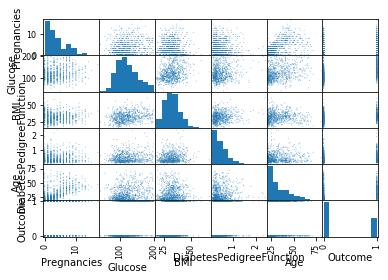

In [152]:
#Histrogram and scatter plot matrix of variables
pd.plotting.scatter_matrix(diabetesDF, s=4);

In [153]:
diabetesDF.corr()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125717,0.018352,-0.029159,0.545238,0.213371
Glucose,0.125717,1.000000,0.232771,0.133945,0.261490,0.494190
BMI,0.018352,0.232771,1.000000,0.153683,0.022144,0.309884
DiabetesPedigreeFunction,-0.029159,0.133945,0.153683,1.000000,0.031674,0.178052
Age,0.545238,0.261490,0.022144,0.031674,1.000000,0.232734
Outcome,0.213371,0.494190,0.309884,0.178052,0.232734,1.000000


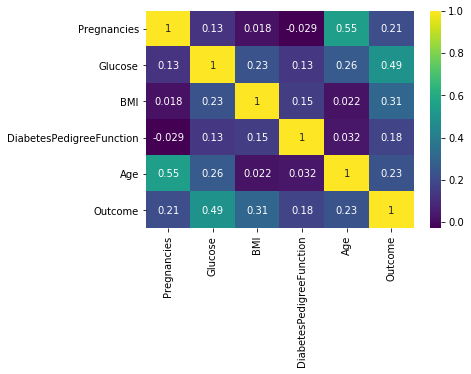

In [154]:
sb.heatmap(diabetesDF.corr(), annot=True, cmap="viridis");

In [155]:
mean, std = np.mean(diabetesDF), np.std(diabetesDF)
z_score = np.abs((diabetesDF - mean) / std)
threshold = 3
use_value = z_score < threshold

In [156]:
# Outliers
print(f'Rejection {(~use_value).sum()} points')
from scipy.stats import norm
print(f"z-score of 3 corresponds to prob of {100 * 2 * norm.sf(threshold):0.2f}%")

Rejection Pregnancies                  4
Glucose                      0
BMI                          4
DiabetesPedigreeFunction    10
Age                          4
Outcome                      0
dtype: int64 points
z-score of 3 corresponds to prob of 0.27%


Keeping the outliers. Even though 17 pregnancies seems a lot, someone just may have that many pregnancies. Also keeping the other outliers as those are possible values in this analysis. 

Text(0.5, 0, 'Number of Pregnancies')

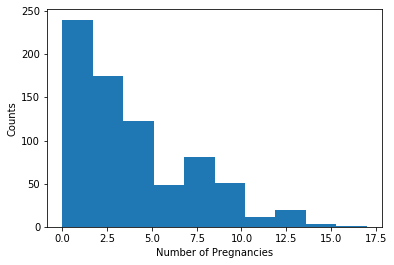

In [193]:
# zoomed-in histogram for Pregnancies

plt.hist(diabetesDF['Pregnancies'], label = 'Pregnancies')
plt.ylabel("Counts")
plt.xlabel('Number of Pregnancies')



Pregnancies distribution is skewed to the right, with a right tail

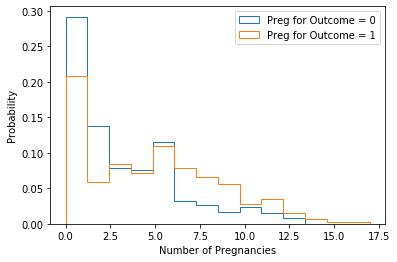

In [210]:
bins = np.linspace(min(outcome_NonDiabetic.Pregnancies.min(), outcome_diabetic.Pregnancies.min()), 
                       max(outcome_NonDiabetic.Pregnancies.max(), outcome_diabetic.Pregnancies.max()), 15)
counts1, _, _ = plt.hist(outcome_NonDiabetic.Pregnancies, bins=bins, label = "Preg for Outcome = 0", histtype='step', density= True)
plt.hist(outcome_diabetic.Pregnancies, bins=bins, label="Preg for Outcome = 1", histtype='step', density = True)
plt.legend()
plt.ylabel("Probability")
plt.xlabel("Number of Pregnancies");

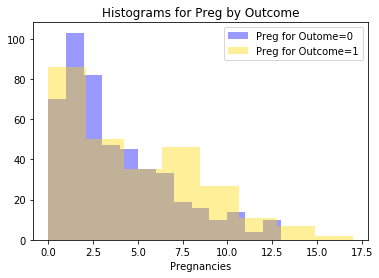

In [196]:
sb.distplot(outcome_NonDiabetic.Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sb.distplot(outcome_diabetic.Pregnancies,kde=False,color = "Gold", label = "Preg for Outcome=1")
plt.title("Histograms for Preg by Outcome")
plt.legend();



Text(0.5, 0, 'Glucose Level')

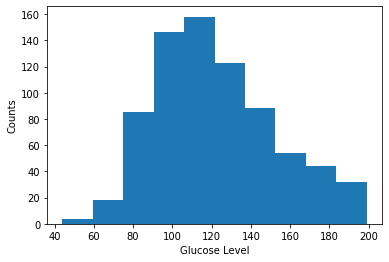

In [136]:
# zoomed-in histogram for Glucose
plt.hist(diabetesDF['Glucose'], label = 'Glucose')
plt.ylabel("Counts")
plt.xlabel("Glucose Level")

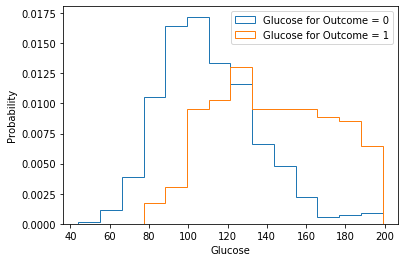

In [211]:
bins = np.linspace(min(outcome_NonDiabetic.Glucose.min(), outcome_diabetic.Glucose.min()), 
                       max(outcome_NonDiabetic.Glucose.max(), outcome_diabetic.Glucose.max()), 15)
counts1, _, _ = plt.hist(outcome_NonDiabetic.Glucose, bins=bins, label = "Glucose for Outcome = 0", histtype='step', density= True)
plt.hist(outcome_diabetic.Glucose, bins=bins, label="Glucose for Outcome = 1", histtype='step', density = True)
plt.legend()
plt.ylabel("Probability")
plt.xlabel("Glucose");

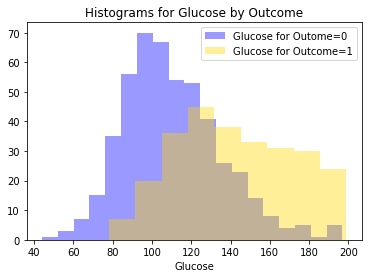

In [206]:
sb.distplot(outcome_NonDiabetic.Glucose,kde=False,color="Blue", label="Glucose for Outome=0")
sb.distplot(outcome_diabetic.Glucose,kde=False,color = "Gold", label = "Glucose for Outcome=1")
plt.title("Histograms for Glucose by Outcome")
plt.legend();


Text(0.5, 0, 'Body Mass Index')

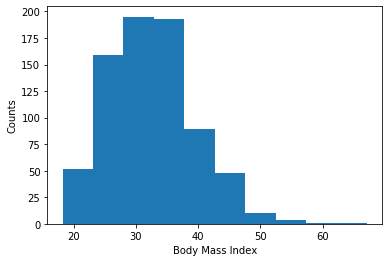

In [137]:
# zoomed-in histogram for BMI
plt.hist(diabetesDF['BMI'], label = 'BMI')
plt.ylabel("Counts")
plt.xlabel("Body Mass Index")

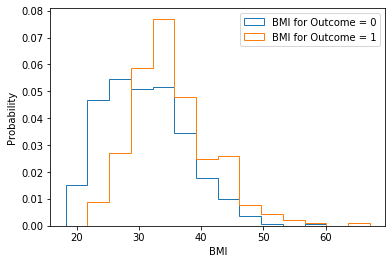

In [212]:
bins = np.linspace(min(outcome_NonDiabetic.BMI.min(), outcome_diabetic.BMI.min()), 
                       max(outcome_NonDiabetic.BMI.max(), outcome_diabetic.BMI.max()), 15)
counts1, _, _ = plt.hist(outcome_NonDiabetic.BMI, bins=bins, label = "BMI for Outcome = 0", histtype='step', density= True)
plt.hist(outcome_diabetic.BMI, bins=bins, label="BMI for Outcome = 1", histtype='step', density = True)
plt.legend()
plt.ylabel("Probability")
plt.xlabel("BMI");

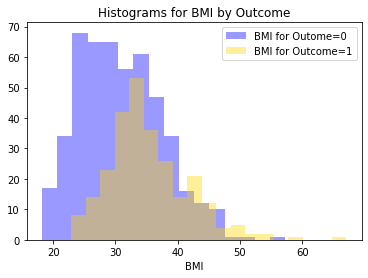

In [208]:
sb.distplot(outcome_NonDiabetic.BMI,kde=False,color="Blue", label="BMI for Outome=0")
sb.distplot(outcome_diabetic.BMI,kde=False,color = "Gold", label = "BMI for Outcome=1")
plt.title("Histograms for BMI by Outcome")
plt.legend();

Text(0.5, 0, 'Diabetes Pedigree Function')

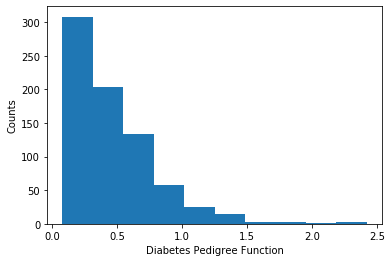

In [138]:
# zoomed-in histogram for DiabetesPedigreeFunction
plt.hist(diabetesDF['DiabetesPedigreeFunction'], label = 'Diabetes Pedigree Function')
plt.ylabel("Counts")
plt.xlabel("Diabetes Pedigree Function")

In [ ]:
Pedigree is skewed to the right, with a right tail

Text(0.5, 0, 'Age in years')

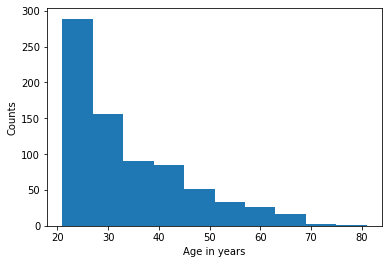

In [139]:
# zoomed-in histogram for Age
plt.hist(diabetesDF['Age'], label = 'Age')
plt.ylabel("Counts")
plt.xlabel("Age in years")

In [ ]:
Age is skewed to the right, with a right tail

Text(0, 0.5, 'Counts')

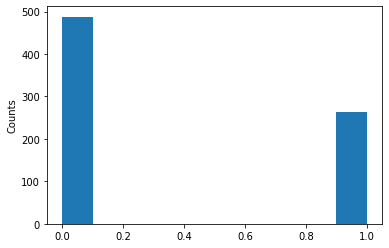

In [140]:
# zoomed-in histogram for Outcome
plt.hist(diabetesDF['Outcome'], label = 'Outcome')
plt.ylabel("Counts")

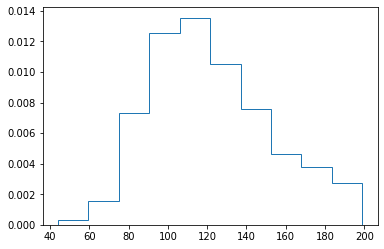

In [186]:
plt.hist(diabetesDF['Glucose'], histtype='step', density = True, alpha=1);

In [168]:
diabetesDF.describe()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,67.100000,2.420000,81.000000,1.000000


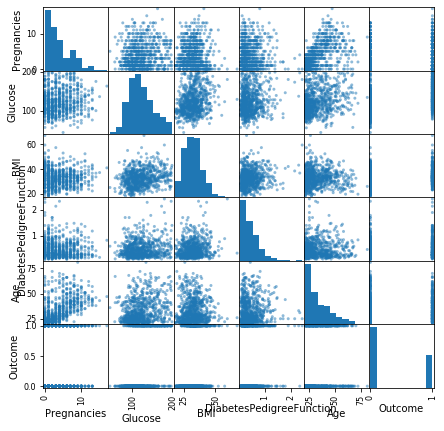

In [169]:
pd.plotting.scatter_matrix(diabetesDF, figsize=(7, 7));

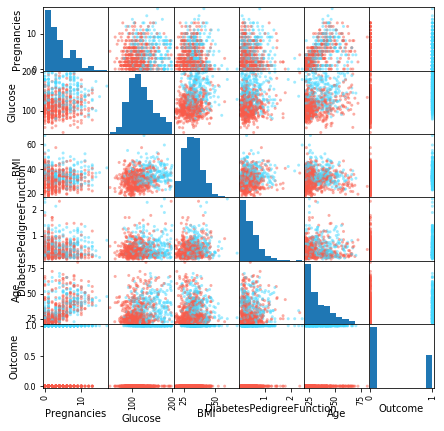

In [172]:
colors = diabetesDF['Outcome'].map(lambda x: "#44d9ff" if x else "#f95b4a")
pd.plotting.scatter_matrix(diabetesDF, figsize=(7,7), color=colors);

In [174]:
ps = np.linspace(0, 100, 10)
x_p = np.percentile(diabetesDF['Glucose'], ps)

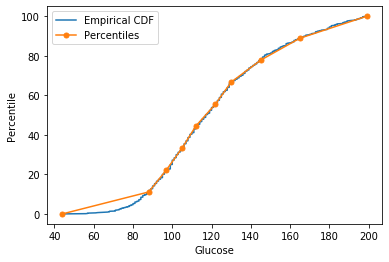

In [176]:
xs = np.sort(diabetesDF['Glucose'])
ys = np.linspace(0, 1, len(diabetesDF))

plt.plot(xs, ys * 100, label = "Empirical CDF")
plt.plot(x_p, ps, label = "Percentiles", marker= ".", ms=10)
plt.legend()
plt.ylabel("Percentile")
plt.xlabel('Glucose');

Below the 10th percentile there is a discrepency between the data and the model: there are more low glucose levels than we would expect in a normal distribution. Since We are specifically interested in high glucose levels as a factor in a diabetic diagnosis. We can see from the glucose histogram that the distribution is approximately normal. 

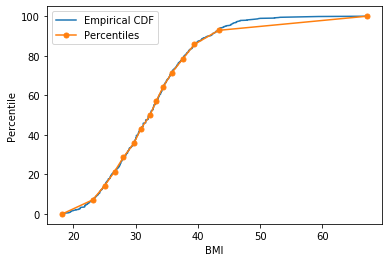

In [181]:
ps = np.linspace(0, 100, 15)
x_p = np.percentile(diabetesDF['BMI'], ps)
xs = np.sort(diabetesDF['BMI'])
ys = np.linspace(0, 1, len(diabetesDF))

plt.plot(xs, ys * 100, label = "Empirical CDF")
plt.plot(x_p, ps, label = "Percentiles", marker= ".", ms=10)
plt.legend()
plt.ylabel("Percentile")
plt.xlabel('BMI');

above the 85th percentile there is a discrepency between the data and the model. 

In [182]:
Glucose_BMI = diabetesDF.loc[(diabetesDF["Glucose"] > 1) & (diabetesDF["BMI"] > 1), ["Glucose", "BMI", "Outcome"]]
Glucose_BMI.head()

,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1


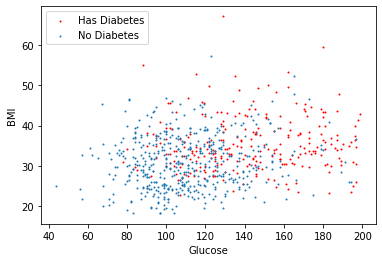

In [230]:
df_y = Glucose_BMI.loc[Glucose_BMI["Outcome"] == 1, ["Glucose", "BMI"]]
df_n = Glucose_BMI.loc[Glucose_BMI["Outcome"] == 0, ["Glucose", "BMI"]]

plt.scatter(df_y["Glucose"], df_y["BMI"], c="red", s=1, label="Has Diabetes")
plt.scatter(df_n["Glucose"], df_n["BMI"], s=1, label="No Diabetes")
plt.legend(loc=2)
plt.xlabel("Glucose")
plt.ylabel("BMI");

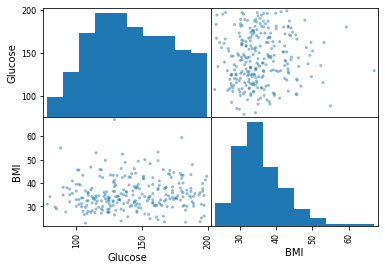

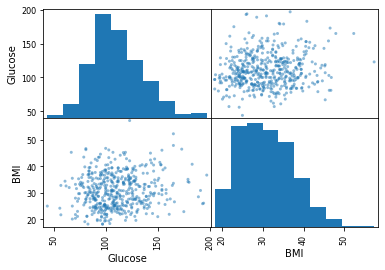

In [185]:
# Plot analytical distrbution of variables. The highest correlated variables to outcome
# Glucose and BMI distributions are approximately Gaussians or normal. 
pd.plotting.scatter_matrix(df_y)
pd.plotting.scatter_matrix(df_n);

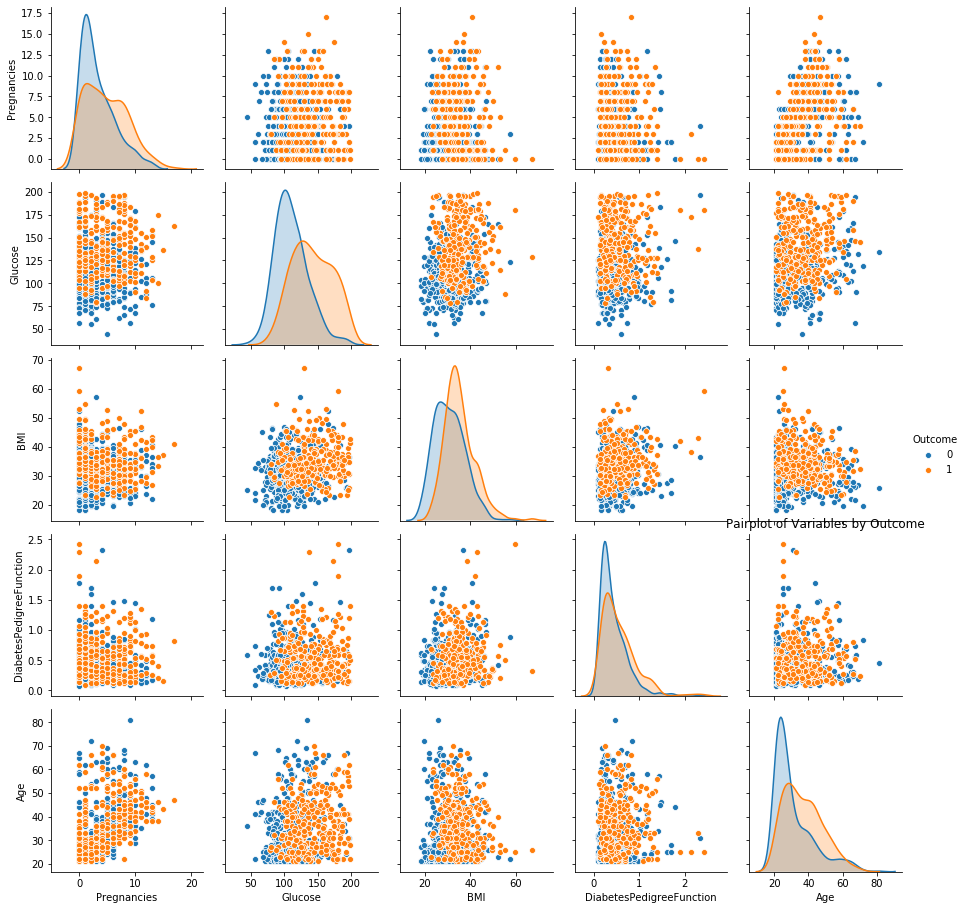

In [217]:
sb.pairplot(diabetesDF, vars=["Pregnancies", "Glucose","BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome");

There are no non-linear relationships

In [220]:
diabetesDF.corr(method='pearson')

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125717,0.018352,-0.029159,0.545238,0.213371
Glucose,0.125717,1.000000,0.232771,0.133945,0.261490,0.494190
BMI,0.018352,0.232771,1.000000,0.153683,0.022144,0.309884
DiabetesPedigreeFunction,-0.029159,0.133945,0.153683,1.000000,0.031674,0.178052
Age,0.545238,0.261490,0.022144,0.031674,1.000000,0.232734
Outcome,0.213371,0.494190,0.309884,0.178052,0.232734,1.000000


In [224]:
# Hypothesis testing and Logistic Regression
cols=["Pregnancies", "Glucose", "BMI","DiabetesPedigreeFunction", "Age"]
X=diabetesDF[cols]
y=diabetesDF.Outcome
import statsmodels.api as sm
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.635023
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  752
Model:                          Logit   Df Residuals:                      747
Method:                           MLE   Df Model:                            4
Date:                Tue, 04 Aug 2020   Pseudo R-squ.:                 0.02018
Time:                        22:51:15   Log-Likelihood:                -477.54
converged:                       True   LL-Null:                       -487.37
Covariance Type:            nonrobust   LLR p-value:                 0.0005796
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1191      0.028      4.242      0.000       0.064

In [226]:
cols2=["Glucose", "BMI"]
X=diabetesDF[cols2]
y=diabetesDF.Outcome
import statsmodels.api as sm
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651400
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  752
Model:                          Logit   Df Residuals:                      750
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 Aug 2020   Pseudo R-squ.:               -0.005087
Time:                        22:52:21   Log-Likelihood:                -489.85
converged:                       True   LL-Null:                       -487.37
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Glucose        0.0105      0.002      4.661      0.000       0.006       0.015
BMI           -0.0529      0.

at p-value<0.05, the variable influences the outcome. By chance, it is unlikely that someone with a high glucose would not have diabetes. So glucose as a variable is statistically significant

In [228]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
cols3=["Glucose","BMI"]
X=diabetesDF[cols3]
y=diabetesDF.Outcome
logreg.fit(X,y)
## Defining the y_pred variable for the predicting values
y_pred=logreg.predict(X)
## Calculating the precision of the model
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       488
           1       0.72      0.54      0.62       264

    accuracy                           0.76       752
   macro avg       0.75      0.71      0.72       752
weighted avg       0.76      0.76      0.76       752



In [229]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[432  56]
 [121 143]]


Model is about 76% accurate at predicting diabetes based on the variables Glucose and BMI. 